In [24]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


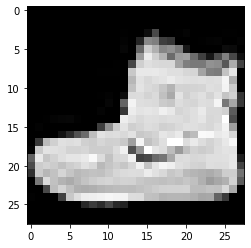

In [28]:
plt.imshow(X_train[0],cmap='gray')

8


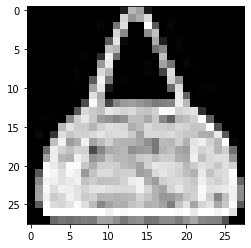

In [35]:
i=random.randint(1,60000)
plt.imshow(X_train[i], cmap='gray')
print(y_train[i])

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot

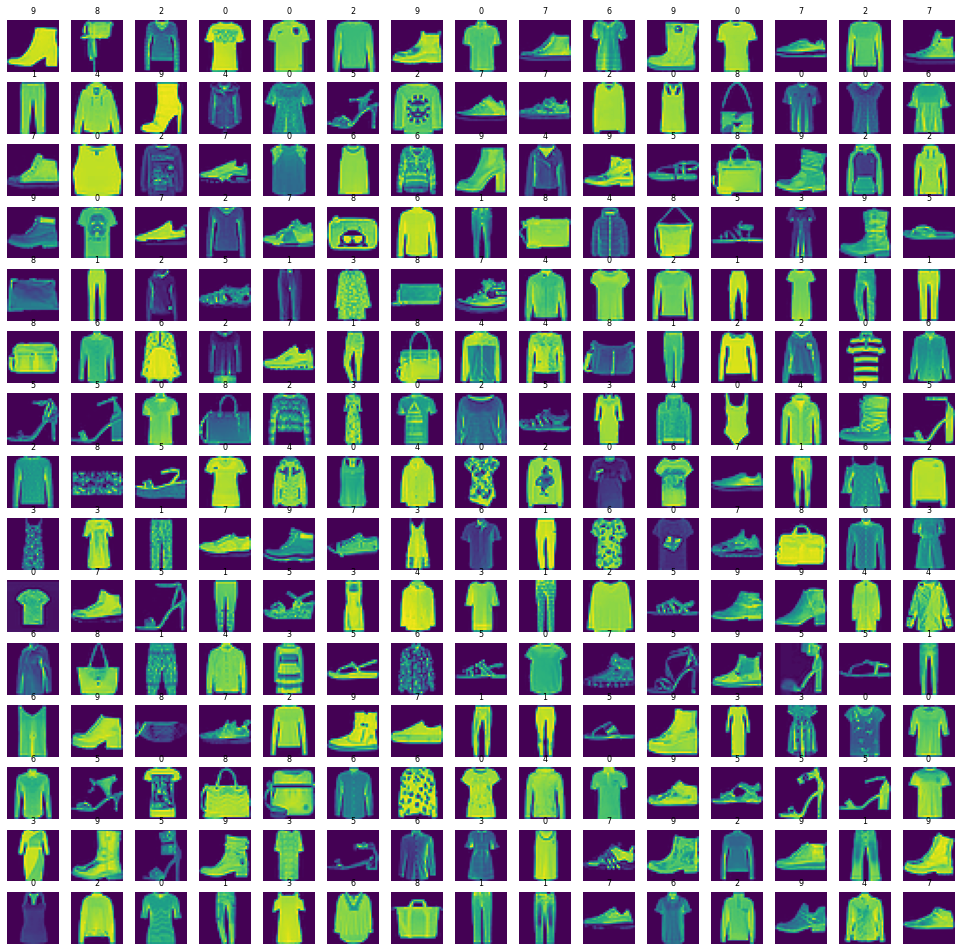

In [37]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid*L_grid):
    index= np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize=8)
    axes[i].axis('off')


In [38]:
#normalize the data
X_train=X_train/255
X_test=X_test/255
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [39]:
#In this step we are going to add some noise to the images
noise_factor = 0.3
noisy_data = []
for img in X_train:
  noisy_image = img + noise_factor*np.random.rand(*img.shape)
  noisy_image = np.clip(noisy_image, 0,1)
  noisy_data.append(noisy_image)

In [52]:
noisy_data = np.array(noisy_data)

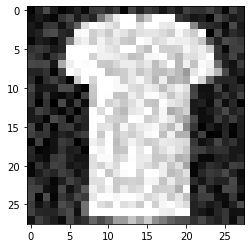

In [44]:
plt.imshow(noisy_data[17],cmap='gray')

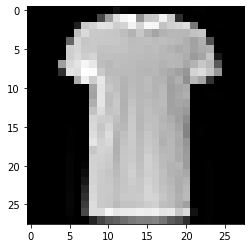

In [45]:
plt.imshow(X_train[17],cmap='gray')

In [46]:
#In this step we are going to add some noise to the images
noise_factor = 0.2
noisy_data_test = []
for img in X_test:
  noisy_image = img + noise_factor*np.random.rand(*img.shape)
  noisy_image = np.clip(noisy_image, 0,1)
  noisy_data_test.append(noisy_image)

In [53]:
noisy_data_test = np.array(noisy_data_test)

In [47]:
len(noisy_data_test)

10000

In [50]:
autoencoder = tf.keras.models.Sequential()
#encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3, strides =2 , padding= 'same', input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8,kernel_size=3, strides =2 , padding= 'same'))

autoencoder.add(tf.keras.layers.Conv2D(filters=8,kernel_size=3, strides =1 , padding= 'same'))

#Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16,kernel_size=3, strides =2 , padding= 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1,kernel_size=3, strides =2 , activation = 'sigmoid', padding= 'same'))

In [51]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [54]:
autoencoder.fit(noisy_data.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noisy_data_test.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 15s 51ms/step - loss: 0.4012 - val_loss: 0.3195
Epoch 2/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3042 - val_loss: 0.3018
Epoch 3/10
300/300 [==============================] - 15s 51ms/step - loss: 0.2931 - val_loss: 0.2959
Epoch 4/10
300/300 [==============================] - 15s 51ms/step - loss: 0.2873 - val_loss: 0.2888
Epoch 5/10
300/300 [==============================] - 15s 50ms/step - loss: 0.2828 - val_loss: 0.2860
Epoch 6/10
300/300 [==============================] - 15s 50ms/step - loss: 0.2794 - val_loss: 0.2812
Epoch 7/10
300/300 [==============================] - 15s 51ms/step - loss: 0.2772 - val_loss: 0.2801
Epoch 8/10
300/300 [==============================] - 15s 50ms/step - loss: 0.2757 - val_loss: 0.2806
Epoch 9/10
300/300 [==============================] - 15s 51ms/step - loss: 0.2746 - val_loss: 0.2785
Epoch 10/10
300/300 [==============================] - 20s 66ms/step - loss: 0.273

In [57]:
evaluation = autoencoder.evaluate(noisy_data_test.reshape(-1,28,28,1), X_test.reshape(-1,28,28,1))
print("Test accuracy obtained : {}".format(evaluation))

313/313 [==============================] - 2s 5ms/step - loss: 0.2782
Test accuracy obtained : 0.2781863510608673


In [61]:
predicted = autoencoder.predict(noisy_data_test[10:20].reshape(-1,28,28,1))

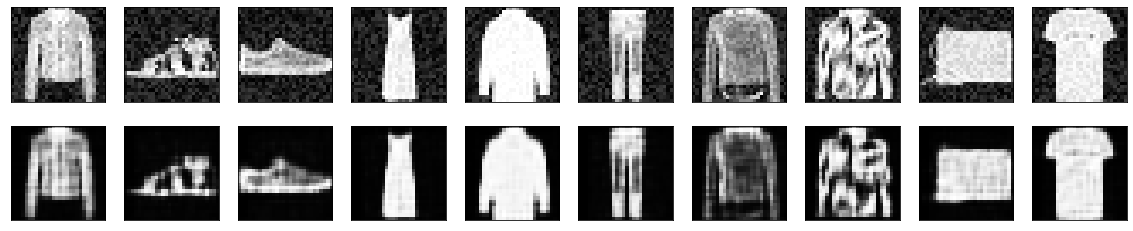

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noisy_data_test[10:20], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)